# Introduction to Machine Learning - School Test Analysis Use Case (part 1)

---

In this three part tutorial you will learn some of the basics of machine learning by exploring a "fake" dataset of elementary school test results from a pretest and then a post test. There are columns of attributes which correspond to different factors (also called features) which contribute to the post test scores.

<ul>
<li>The overall goal at the end of the third notebook is to utilize this dataset to train and test machine learning algorithms. Part of the data will be used to train the algorithm and part will be used to test it to see how well we did on our predictions.

<li>We will use this dataset for all three of the notebooks.

<li>In additional tutorials we will explore other machine learning topics like language models and neural networks which are the technologies behind Generative AI and the chatbots they power such as ChatGPT.

</ul>


**Our goal is to give you an understanding of the basics so you can experiment and one day create your own innovative solutions!**

#Part 1: Getting Started and Setting up Your Workflow
For these tutorials we will use .ipynb files which are a notebook filesystem you can use on a variety of platforms. We will be describing how to access it and use it in Google Colaboratory (**Google Colab**), which is available free as part of the Google Suite of tools.

In this notebook, we will walk you through the setup and will provide the initial data and basic analysis functions to get you started.

#Setting up our tools and adding data

---

Before we begin, let's start with a quick description of the tools we will use. For this task we will use the Python programming language version 3 and libraries that Python can use to accomplish the work. Python is the language this Jupyter notebook is based on so there is some functionality that we could use without additional libraries (**there are other options available but we won't use them in this tutorial**). To do the type of analysis and model building we are interested in, we need to add libraries that work with Python to accomplish our desired tasks.


##Functionality without additional libraries
Run the cells below for an example of the type of actions Python can do without libraries. If you are already familiar with Python and how the libraries work, you can skip this section.

In [ ]:
# Addition
5 + 2

7

In [ ]:
# Subtraction
5 - 2

3

In [ ]:
# Multiplication
5 * 2

10

In [ ]:
# Exponents
5 ** 2

25

In [ ]:
# Storing values in variables and performing actions on the variables

five = 5
two = 2

Addition = five + two
Subtraction = five - two
Exponent = five ** two

print(Addition)
print(Subtraction)
print(Exponent)

7
3
25


In [ ]:
# Add more context to the numbers
# There are many ways to print and manipulate values in python. These are just a few to show the power of the language.

print('Five plus two = ',Addition)
print('Five minus two = ',Subtraction)
print('Five to the second exponent = ',Exponent)

Five plus two =  7
Five minus two =  3
Five to the second exponent =  25


## Add the libraries we need

Add libraries to add the tools we need to read, analyze, and build models with the data. Run the code cell below to add the libraries we need.

In [ ]:
# These library packages are installed in the Python 3 environment but you have to load them in order to use them in your environment.
# Hit the arrow button to the left to run this cell and load the library packages

# basic library packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# specific library packages for machine learning from the sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

##Add the data we plan to use
In order to do an analysis on data, we need data 😀! Here are the basic steps to add data to your Google Colab environment. If you need details for each step, review the instructions in the subfolders below.


1.   Copy and paste the following URL into your web browser to the location where the data comes from: https://www.kaggle.com/datasets/kwadwoofosu/predict-test-scores-of-students

2.   Sign in or create a Kaggle Account (it's free!)

3.   Download the data to your computer

4.   Upload the data to your colab environment

5.   Hover over the location of your data in the file pane on the left of the colab window.

4.   Write down where the data is located in your colab file system. In my file system it looks like this: /content/test_scores.csv
We will use this location later in order to pull the information into our notebook for analysis.



###**Getting Data from Kaggle.com (steps 1 - 3 from above)**
After you navigate to the data on kaggle.com and are able to sign-in you need to download the data. Below is a screenshot of how you download the data.  

---

<img src="https://img1.wsimg.com/isteam/ip/cd1122cd-7b26-4fd3-b2d9-8bea62e6bca1/data_download.png/:/rs=w:1560,h:576">

###**Uploading the data to your colab environment (step 4 from above)**
Now that you have downloaded your data to your computer, you need to upload it to your colab environment. The images below show you how that is done.

---

**(a) Click on the "folder" icon on the left of your screen. This will open the files pane.**
<img src="https://img1.wsimg.com/isteam/ip/cd1122cd-7b26-4fd3-b2d9-8bea62e6bca1/upload.png/:/rs=w:2560,h:1852">


---


**(b) Next you will click on the "upload file" folder and navigate to where your file was downloaded on your computer.**

<img src="https://img1.wsimg.com/blobby/go/cd1122cd-7b26-4fd3-b2d9-8bea62e6bca1/downloads/navigate_to_data.png?ver=1680980134208">


---


**(c) Once you find the file with your data, click on the file to upload it to colab.**
<img src="https://img1.wsimg.com/isteam/ip/cd1122cd-7b26-4fd3-b2d9-8bea62e6bca1/navigate_to_file.png/:/rs=w:2560,h:2067">

###**Warning about data disappearing after exiting**
When you upload data into colab, the data is in what we call a non-persistent state. This means the data will not remain once you exit the program or even after a period of time in which you have not been active on the code. This is OK, because all you have to do is follow step 4 from above to upload the data again from the location it was downloaded before. Click OK on the screen to proceed.

---



<img src="https://img1.wsimg.com/isteam/ip/cd1122cd-7b26-4fd3-b2d9-8bea62e6bca1/warning.png/:/rs=w:984,h:572">

###**Find and write down the location of your data for later use**
After uploading your data, you need to identify the address it is located in on the colab file system. To do this, you hover over the name of your data in the "Files" pane, and click on the three dots to the right of the file name. Click on copy path and then save this location for later.

---


<img src="https://img1.wsimg.com/blobby/go/cd1122cd-7b26-4fd3-b2d9-8bea62e6bca1/downloads/copy_path.png?ver=1680980808236">

# Defining the problem and understanding the background of the data

Defining the problem and determining if your available data can solve the problem is an often overlooked part of artificial intelligence (AI) and machine learning (ML). Our goal should be to build algorithms out of data that accurately represents whatever it is you plan on modeling and predicting. This is really hard to do if you don't know the context or background of the data. The remainder of this text cell contains a minimal description of the problem and the data we are using to address the problem.

---
**Background context.** We have identified a dataset that describes how a group of students performed on a test. The scores on the tests follow a relatively "normal" distribution, meaning a few of the students scored very high on the test, a few of the students scored very low on the test, and most of the students scored somewhere in-between. The data includes recorded activities that happened or were experienced after the pretest and before the students took the post test. These activities are also often called factors, fields, or features. We will try to use the word features to describe these activities once they are being used in the model.


---
**The problem.** In general, we assume that there are a group of students that would love to do well on this test. These students could benefit from a prediction system that evaluates activities (features in the model), and then outputs a prediction of how well a student that experienced those activies will do on the test. This student and/or their guardians could then identify what activities they need to focus on in order to improve their score in the future.

---

**The dataset.** Our dataset is one of the sample files from the IBM Statistical Package for the Social Sciences (SPSS). The dataset uses a student number and no names so no personal information is exposed. Although not confirmed, we believe the dataset is fabricated and is only used for the purposes of testing analytical methods, so we do not have any proof that these values represent how a real (human) student is modeled. The image below shows what the data looks like in a comma separated value (csv) file which is the format we will use to input the data. This is a common way to save data that will be used as input for Machine Learning or Artificial Intelligence algorithms. This type of file is often generated using the Microsoft Excel application.

---


<img src="https://img1.wsimg.com/isteam/ip/cd1122cd-7b26-4fd3-b2d9-8bea62e6bca1/test_scores.png/:/rs=w:1160,h:471">


---



**Description of the features.** As mentioned earlier the activities the students conducted before the post test is recorded in fields. Each column is a field. These fields are utilized in our algorithms as features and they are just attributes to describe each student's experience with an activity that we believe is related to how they performed on the post test. We will use these attributes (features) to train our machine learning models to predict what new students that have similar features will score on their test. In our machine learning models, features are weighted individually and in combination with each other in order to add or take away from the ability to make predictions.

---




<center> <b> Short Description of Features </b> </center>

**school:** Name of the school the student is enrolled in.

**school_setting:** The location of the school

**school_type:** The type of school. Either public or non-public

**classroom:** The type of classroom

**teaching_method:** Either experimental or Standard

**n_student:** Number of students in the class

**student_id:** A unique ID for each student

**gender:** The gender of the students: male or female

**lunch:** Whether a student qualifies for free/subsidized lunch or not

**pretest:** The pretest score of the students out of 100

**posttest:** The posttest scores of the students out of 100

---



**IMPORTANT NOTE: When training our models we use the posttest as our target variable. The target variable is the answer you are trying to obtain. We need this for training, but we don't use this for our test set or when trying to predict this value with new data.**

# Exploratory Data Analysis (EDA)


---

Now that we understand a little bit about where our data came from and what the features mean, it's time for us to do some programmatic exploratory data analysis (EDA). Here we will use the Panda's package (install pandas as pd), to investigate the data.

**Let's look at the data.** Run the code block below. Here's what's happening in your code:


*   You are inserting data from the ***test_data.csv*** file into the colab notebook
*   You are converting your csv data into a software format called ***Pandas*** so we can analyze it easier
*   You are showing 5 records of the table in the ***Pandas*** format using the .head() function. the df is the variable that stores your data from the csv.

In [ ]:
# Code to insert test_scores.csv data into a variable called df
# The df.head() command displays the top 5 records from the test_scores.csv file

df = pd.read_csv("/content/test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


Take a second and scroll back up to the microsoft excel image above and compare.

---

As you can see, the same data is represented here where each row is a record of one student and each column represents a feature that describes that student's ability to take the test.

** **one thing to point out again is that this record still includes the posttest. This is used in training, but not in testing. We will reiterate that more as we move forward.**

## Normal(ish) Distribution

Earlier we mentioned that the dataset largely follows a trend that is generally considered the normal distribution. This is a trend that is seen in many datasets and topics and is desirable to use as a model because we can use a variety of statistical methods to analyze this type of data. This type of distribution typically stabilizes variance and minimizes skewness (more on this in a later tutorial). The image below displays our data as a normal(ish) distribution. We call this normal(ish) because there is some outlier variation in the middle scores.


---
***It is important to note that some other projects have done a strict analysis of this dataset and do not believe it completely follows the normal distribution. Since we are only trying to explain the fact that most people on this test will fit into the average category, we believe our description is valid and does not need a strict interpretation.***

Text(0.5, 0, 'Score')

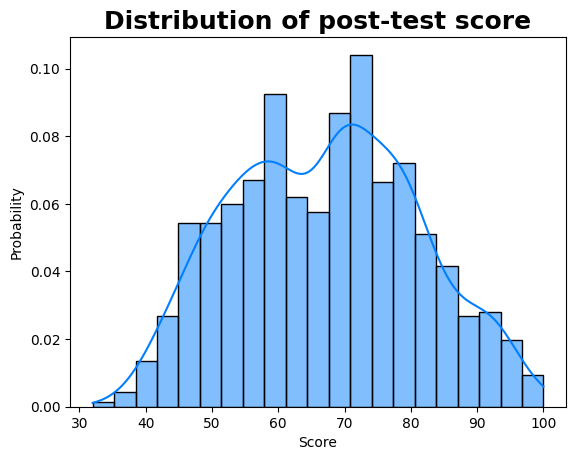

In [ ]:
bar_color="#027ffc"
# plot
fig = sns.histplot(data=df,
                   x="posttest",
                   kde=True,
                   stat="probability",
                   color=bar_color
                  );

plt.title("Distribution of post-test score", fontweight="bold", fontsize=18)
plt.xlabel("Score")

#Tutorial 1 Complete!
That's it for tutorial 1! In the next tutorial notebook we will explore more charts and analysis of the data to get a better understanding of the features that will factor into the model training and why the **"weights"** of those features are important. Let me know how helpful this has been and we appreciate any other feedback!